In [1]:
username = 'OOIAPI-2LDBHH89E4283N'
token = 'TEMP-TOKEN-DAY1R1YSKH66FQ'

In [2]:
import requests
import time

In [3]:
subsite = 'RS03INT1'
node = 'MJ03C'
sensor = '10-TRHPHA301'
method = 'streamed'
stream = 'trhph_sample'
beginDT = '2014-09-27T06:46:07.055936000Z'
endDT = '2023-03-27T11:02:10.540987904Z'

In [4]:
base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

data_request_url ='/'.join((base_url,subsite,node,sensor,method,stream))
params = {
    'beginDT':beginDT,
    'endDT':endDT,   
}

In [5]:
r = requests.get(data_request_url, params=params, auth=(username, token))
data = r.json()

In [6]:
print(data['allURLs'][0])

https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/dalkec@uw.edu/20231209T032813537Z-RS03INT1-MJ03C-10-TRHPHA301-streamed-trhph_sample/catalog.html


In [7]:
print(data['allURLs'][1])

https://downloads-west.oceanobservatories.org/async_results/dalkec@uw.edu/20231209T032813537Z-RS03INT1-MJ03C-10-TRHPHA301-streamed-trhph_sample


In [8]:
%%time
check_complete = data['allURLs'][1] + '/status.txt'
for i in range(1800): 
    r = requests.get(check_complete)
    if r.status_code == requests.codes.ok:
        print('request completed')
        break
    else:
        time.sleep(1)

request completed
CPU times: user 2.02 s, sys: 105 ms, total: 2.12 s
Wall time: 1min 30s


In [ ]:
url = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/dalkec@uw.edu/20231115T040617966Z-RS03INT1-MJ03C-10-TRHPHA301-streamed-trhph_sample/catalog.html'

In [ ]:
import re
import xarray as xr
import pandas as pd
import os

In [ ]:
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]

In [ ]:
datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/dalkec@uw.edu/20231115T040617966Z-RS03INT1-MJ03C-10-TRHPHA301-streamed-trhph_sample/deployment0008_RS03INT1-MJ03C-10-TRHPHA301-streamed-trhph_sample_20220813T043149.716216-20230327T110210.540988.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/dalkec@uw.edu/20231115T040617966Z-RS03INT1-MJ03C-10-TRHPHA301-streamed-trhph_sample/deployment0007_RS03INT1-MJ03C-10-TRHPHA301-streamed-trhph_sample_20210830T161207.877102-20220812T174346.195004.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/dalkec@uw.edu/20231115T040617966Z-RS03INT1-MJ03C-10-TRHPHA301-streamed-trhph_sample/deployment0006_RS03INT1-MJ03C-10-TRHPHA301-streamed-trhph_sample_20200808T045716.919326-20210226T170750.222624.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/dalkec@uw.edu/20231115T040617966Z-RS03INT1-MJ03C-10-TRHPHA301-streamed-trhph_sample/deployment0005_RS03INT1-MJ03C-10-TRHPHA301-streamed-trhph_sample_20190901T000001

In [13]:
# Note this may take a while
ds = xr.open_mfdataset(datasets)
ds = ds.swap_dims({'obs': 'time'})
ds = ds.chunk({'time': 100})
ds

<xarray.Dataset>
Dimensions:                               (time: 1166739)
Coordinates:
    obs                                   (time) int32 dask.array<chunksize=(100,), meta=np.ndarray>
  * time                                  (time) datetime64[ns] 2014-09-27T06...
Data variables: (12/28)
    ref_temp_volts                        (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    vent_fluid_temperature_qc_executed    (time) int8 dask.array<chunksize=(100,), meta=np.ndarray>
    resistivity_temp_degc                 (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    resistivity_temp_volts                (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    vent_fluid_temperature_qc_results     (time) int8 dask.array<chunksize=(100,), meta=np.ndarray>
    ref_temp_degc                         (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    ...                                    ...
    vent_fluid_orp                        (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    preferred_timestamp                   (time) object dask.array<chunksize=(100,), meta=np.ndarray>
    resistivity_x1                        (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    resistivity_x5                        (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    eh_sensor                             (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    vent_fluid_chloride_conc              (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
Attributes: (12/74)
    _NCProperties:                      version=1|netcdflibversion=4.6.1|hdf5...
    node:                               MJ03C
    comment:                            
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  streamed
    ...                                 ...
    geospatial_vertical_positive:       down
    lat:                                45.92637
    lon:                                -129.979178
    DODS.strlen:                        14
    DODS.dimName:                       string14
    DODS_EXTRA.Unlimited_Dimension:     obs

In [14]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np

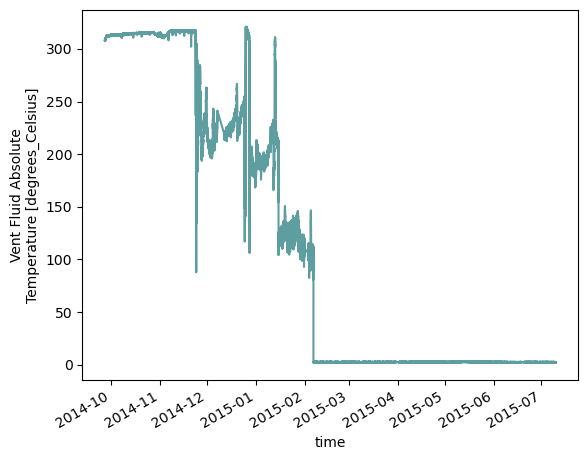

In [15]:
ds['vent_fluid_temperature'].plot(color='cadetblue')
plt.title('Vent Fluid Temperature')
plt.show();

In [16]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    df = ds['vent_fluid_temperature'].to_dataframe()
    df = df.resample('min').mean() # minute average

[########################################] | 100% Completed | 5.54 sms
[########################################] | 100% Completed | 8.98 ss
CPU times: user 13.7 s, sys: 3.22 s, total: 16.9 s
Wall time: 15.8 s


In [18]:
%%time
time = []
time_pd = pd.to_datetime(ds.time.values.tolist())
for i in time_pd:
    i = np.datetime64(i).astype(datetime.datetime)
    time.append(dates.date2num(i))

CPU times: user 55.2 s, sys: 136 ms, total: 55.3 s
Wall time: 56 s


In [19]:
%%time
temperature = ds['vent_fluid_temperature'].values.tolist()

CPU times: user 2.69 s, sys: 493 ms, total: 3.18 s
Wall time: 3.18 s


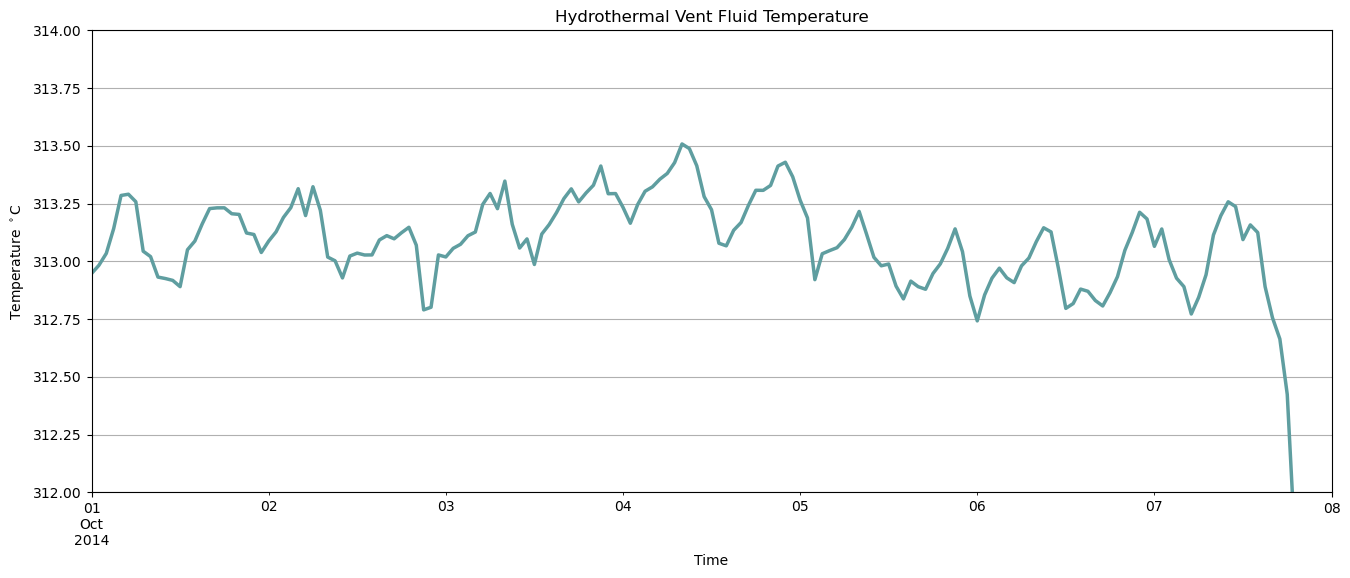

CPU times: user 609 ms, sys: 119 ms, total: 728 ms
Wall time: 525 ms


In [20]:
%%time
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
df['vent_fluid_temperature'].resample('H').mean().plot(ax=ax, color='cadetblue', linewidth=2.5) # hourly average
ax.set_xlim(datetime.datetime(2014, 10, 1, 0, 0),datetime.datetime(2014, 10, 7, 0, 0))
ax.set_ylim(312,314)
ax.yaxis.grid(True)
plt.title("Hydrothermal Vent Fluid Temperature: October")
plt.ylabel('Temperature $^\circ$C')
plt.xlabel('Time')
plt.show()

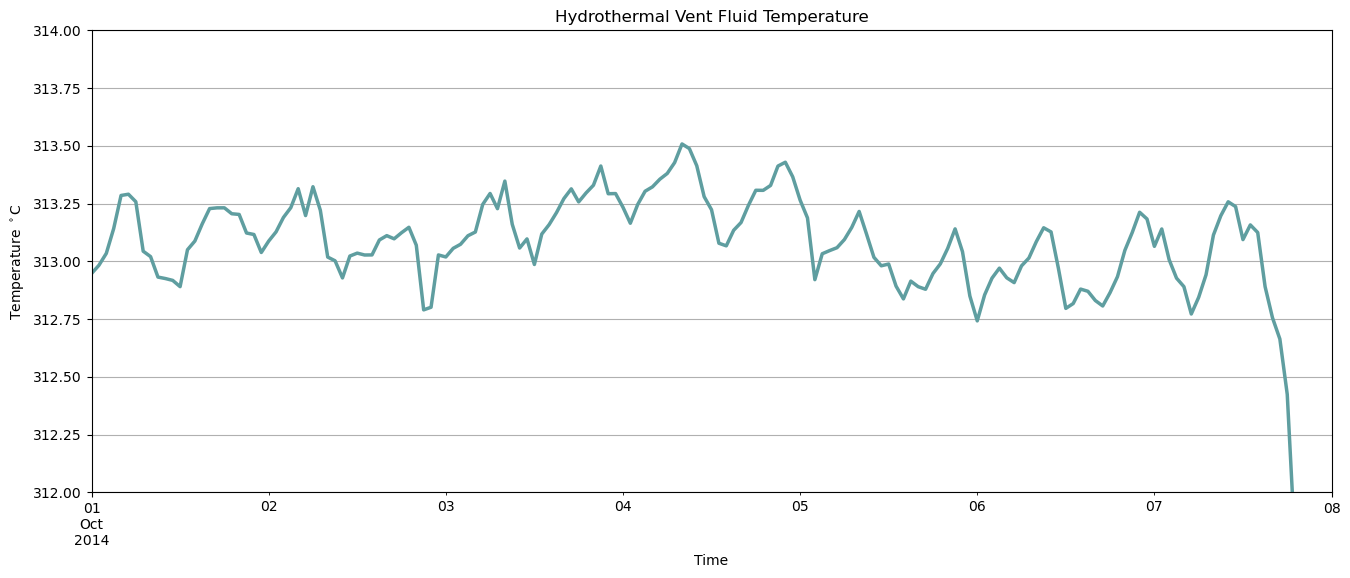

CPU times: user 609 ms, sys: 119 ms, total: 728 ms
Wall time: 525 ms


In [20]:
%%time
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
df['vent_fluid_temperature'].resample('H').mean().plot(ax=ax, color='cadetblue', linewidth=2.5) # hourly average
ax.set_xlim(datetime.datetime(2015, 3, 1, 0, 0),datetime.datetime(2015, 3, 7, 0, 0))
ax.set_ylim(2,2.4)
ax.yaxis.grid(True)
plt.title("Hydrothermal Vent Fluid Temperature: March")
plt.ylabel('Temperature $^\circ$C')
plt.xlabel('Time')
plt.show()

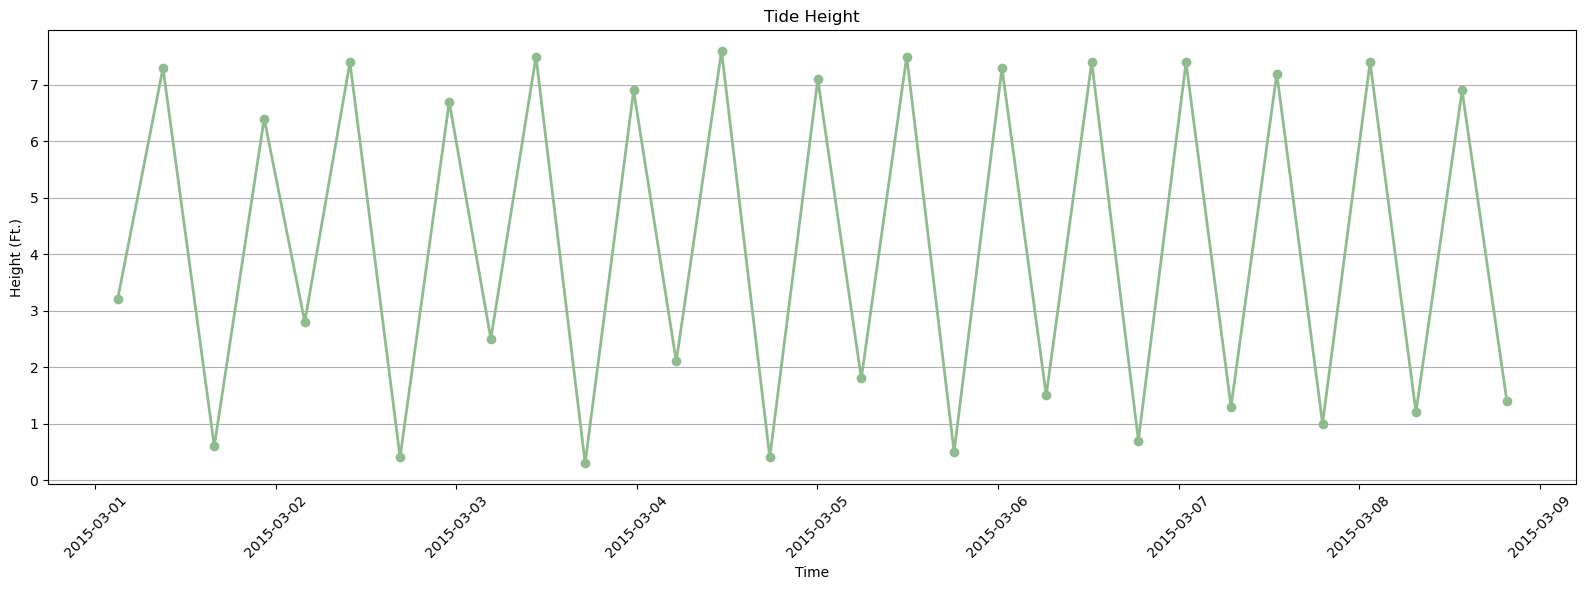

In [21]:
import matplotlib.pyplot as plt
from datetime import datetime

plt.close()

### This is tide data from shore that I got from a NOAA tide table PDF. 


# Manually added tide data from 2015 tide table into array 
tide_data = """03/01/2015 02:58 3.2
03/01/2015 09:00 7.3
03/01/2015 15:49 0.6
03/01/2015 22:27 6.4
03/02/2015 03:51 2.8
03/02/2015 09:51 7.4
03/02/2015 16:31 0.4
03/02/2015 23:03 6.7
03/03/2015 04:35 2.5
03/03/2015 10:35 7.5
03/03/2015 17:07 0.3
03/03/2015 23:34 6.9
03/04/2015 05:14 2.1  
03/04/2015 11:15 7.6
03/04/2015 17:40 0.4
03/05/2015 00:03 7.1
03/05/2015 05:50 1.8
03/05/2015 11:52 7.5
03/05/2015 18:10 0.5
03/06/2015 00:32 7.3
03/06/2015 06:25 1.5
03/06/2015 12:28 7.4
03/06/2015 18:40 0.7
03/07/2015 01:00 7.4
03/07/2015 06:59 1.3
03/07/2015 13:04 7.2
03/07/2015 19:09 1.0
03/08/2015 01:28 7.4
03/08/2015 07:34 1.2
03/08/2015 13:42 6.9
03/08/2015 19:39 1.4"""

# Adjusted it to make it usable
lines = tide_data.split('\n')
dates = []
heights = []
for line in lines:
    parts = line.split()
    date_time_str = parts[0] + ' ' + parts[1]
    date_time_format = '%m/%d/%Y %H:%M' if len(parts[1]) == 5 else '%m/%d/%Y %H%M'
    date_time = datetime.strptime(date_time_str, date_time_format)
    height = float(parts[2])
    dates.append(date_time)
    heights.append(height)

# Plotted the tide data
plt.figure(figsize=(16, 6))
plt.plot(dates, heights, marker='o', linestyle='-', linewidth=2, color='darkseagreen')
plt.grid(axis='y')
plt.title('Tide Height')
plt.xlabel('Time')
plt.ylabel('Height (Ft.)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CPU times: user 446 ms, sys: 1.87 ms, total: 448 ms
Wall time: 448 ms


Text(0.5, 1.0, 'Tide Height vs. Fluid Temperature')

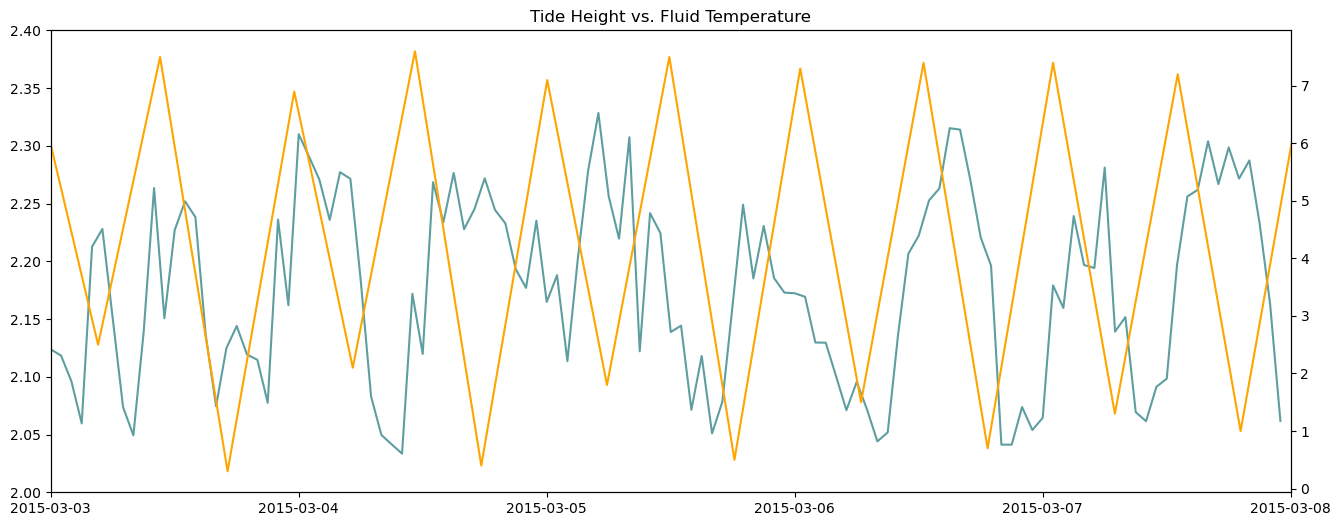

In [22]:
%%time
plt.close()
vent_temp_resample = df['vent_fluid_temperature'].resample('H').mean()
fig, axs = plt.subplots(figsize=(16, 6))
axs.plot(vent_temp_resample, color='cadetblue')
axs.set_xlim([datetime(2015,3,3), datetime(2015,3,8)])
axs.set_ylim(2,2.4)
axs2 = axs.twinx()
axs2.plot(dates, heights, color='orange')
plt.title('Tide Height vs. Fluid Temperature')

In [24]:
pip install ephem

  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
Note: you may need to restart the kernel to use updated packages.


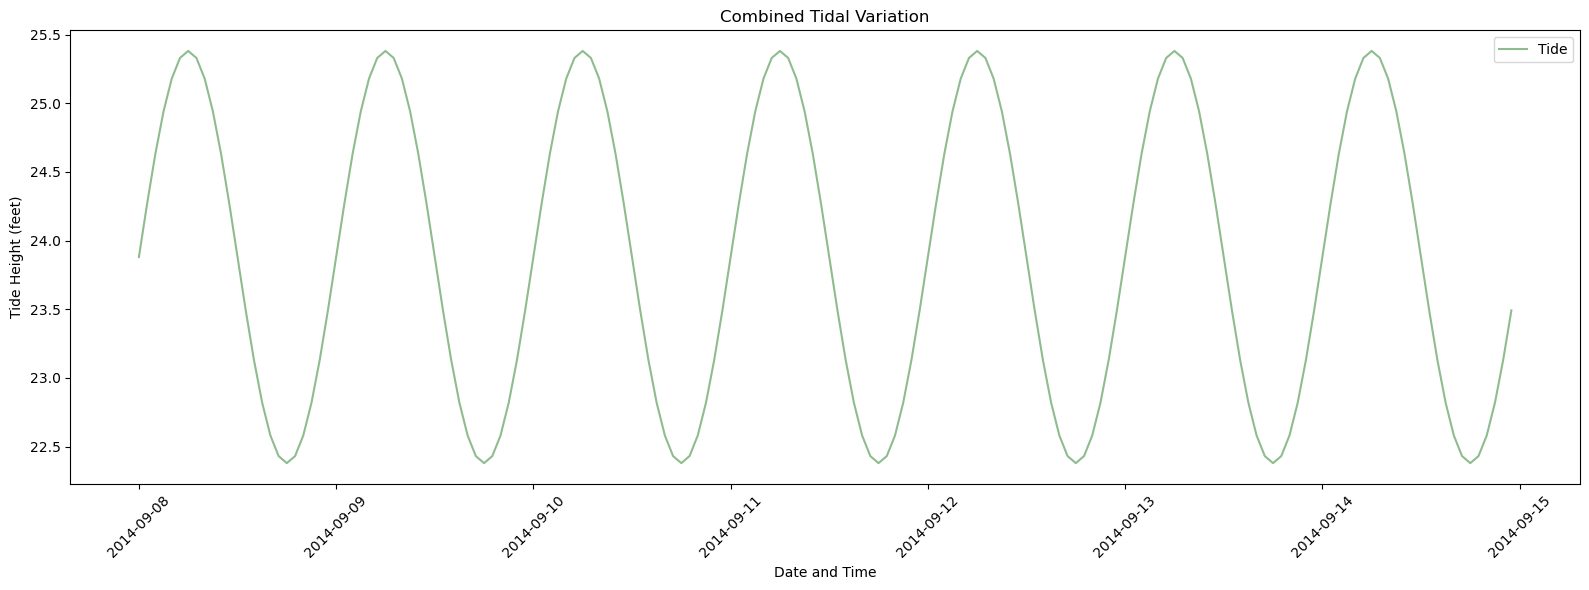

In [33]:
import ephem
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
# imported packages

def calculate_lunar_tide(latitude, longitude, date_time):
    # Calculated lunar tide based on the Moon's position
    observer = ephem.Observer()
    observer.lat = str(latitude)
    observer.lon = str(longitude)

    moon = ephem.Moon(date_time)
    moon.compute(observer)

    lunar_tide = 12 * (1 + moon.alt / 90)  # Base lunar tide

    return lunar_tide

def generate_tide_data_with_sine_wave(start_date, end_date, base_tide, amplitude):
    date_format = "%Y-%m-%d %H:%M:%S"
    current_date = start_date
    tide_data = []

    while current_date <= end_date:
        # Calculated lunar tide based on the Moon's position
        lunar_tide = calculate_lunar_tide(latitude, longitude, current_date)

        # Calculated sine wave tidal variation
        sine_variation = amplitude * np.sin(2 * np.pi * current_date.hour / 24)

        # Combined lunar tide and sine wave variation
        combined_tide = base_tide + lunar_tide + sine_variation

        tide_data.append((current_date.strftime(date_format), combined_tide))
        current_date += timedelta(hours=1)

    return tide_data

# Set location to Axial Seamount
latitude = 46.0600
longitude = -130.0000
start_date = datetime(2014, 9, 8, 0, 0, 0)
end_date = datetime(2014, 9, 14, 23, 0, 0)
base_tide = 12  # Base tide level
amplitude = 1.5  # Amplitude of sine wave tidal variation

tide_data = generate_tide_data_with_sine_wave(start_date, end_date, base_tide, amplitude)

# Defined the date_format
date_format = "%Y-%m-%d %H:%M:%S"

# Plotted the combined tidal data
plt.figure(figsize=(16, 6))
plt.plot([datetime.strptime(point[0], date_format) for point in tide_data], [point[1] for point in tide_data], label='Tide', color='darkseagreen')

# Made it pretty
plt.title('Combined Tidal Variation')
plt.xlabel('Date and Time')
plt.ylabel('Tide Height (feet)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

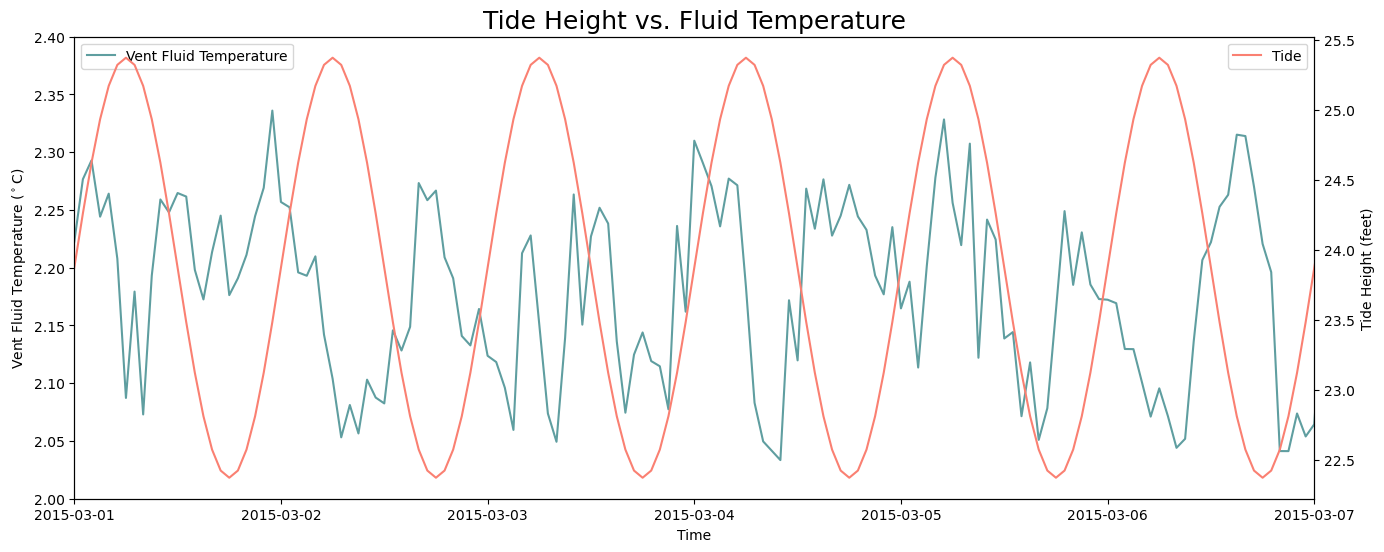

In [57]:
import ephem
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
# imported packages

def calculate_lunar_tide(latitude, longitude, date_time):
    # Calculated lunar tide based on the Moon's position
    observer = ephem.Observer()
    observer.lat = str(latitude)
    observer.lon = str(longitude)

    moon = ephem.Moon(date_time)
    moon.compute(observer)

    lunar_tide = 12 * (1 + moon.alt / 90)  # Base lunar tide

    return lunar_tide

def generate_tide_data_with_sine_wave(start_date, end_date, base_tide, amplitude):
    date_format = "%Y-%m-%d %H:%M:%S"
    current_date = start_date
    tide_data = []

    while current_date <= end_date:
        # Calculated lunar tide based on the Moon's position
        lunar_tide = calculate_lunar_tide(latitude, longitude, current_date)

        # Calculated sine wave tidal variation
        sine_variation = amplitude * np.sin(2 * np.pi * current_date.hour / 24)

        # Combined lunar tide and sine wave variation
        combined_tide = base_tide + lunar_tide + sine_variation

        tide_data.append((current_date.strftime(date_format), combined_tide))
        current_date += timedelta(hours=1)

    return tide_data

# Set location to Axial Seamount and chose a timeframe
latitude = 46.0600
longitude = -130.0000
start_date = datetime(2015, 3, 1, 0, 0, 0)
end_date = datetime(2015, 3, 7, 23, 0, 0)
base_tide = 12  # Base tide level
amplitude = 1.5  # Amplitude of sine wave tidal variation

tide_data = generate_tide_data_with_sine_wave(start_date, end_date, base_tide, amplitude)

# Defined the date_format
date_format = "%Y-%m-%d %H:%M:%S"

# Loading in vent data
ds = xr.open_mfdataset(datasets)
ds = ds.swap_dims({'obs': 'time'})
ds = ds.chunk({'time': 100})

df = ds['vent_fluid_temperature'].to_dataframe()
df = df.resample('min').mean() # minute average

vent_temp_resample = df['vent_fluid_temperature'].resample('H').mean()

fig, axs = plt.subplots(figsize=(16, 6))

# Plot vent fluid temperature
axs.plot(vent_temp_resample, color='cadetblue', label='Vent Fluid Temperature')
axs.set_xlim([datetime(2015, 3, 1), datetime(2015, 3, 7)])
axs.set_ylim(2, 2.4)
axs.set_xlabel('Time')
axs.set_ylabel('Vent Fluid Temperature ($^\circ$C)')

# Plot tidal data
axs2 = axs.twinx()
axs2.plot([datetime.strptime(point[0], date_format) for point in tide_data], [point[1] for point in tide_data], label='Tide', color='salmon')
axs2.set_ylabel('Tide Height (feet)')

# Set common title
plt.title('Tide Height vs. Fluid Temperature', fontsize=18)

# Show legends
axs.legend(loc='upper left')
axs2.legend(loc='upper right')

plt.show()

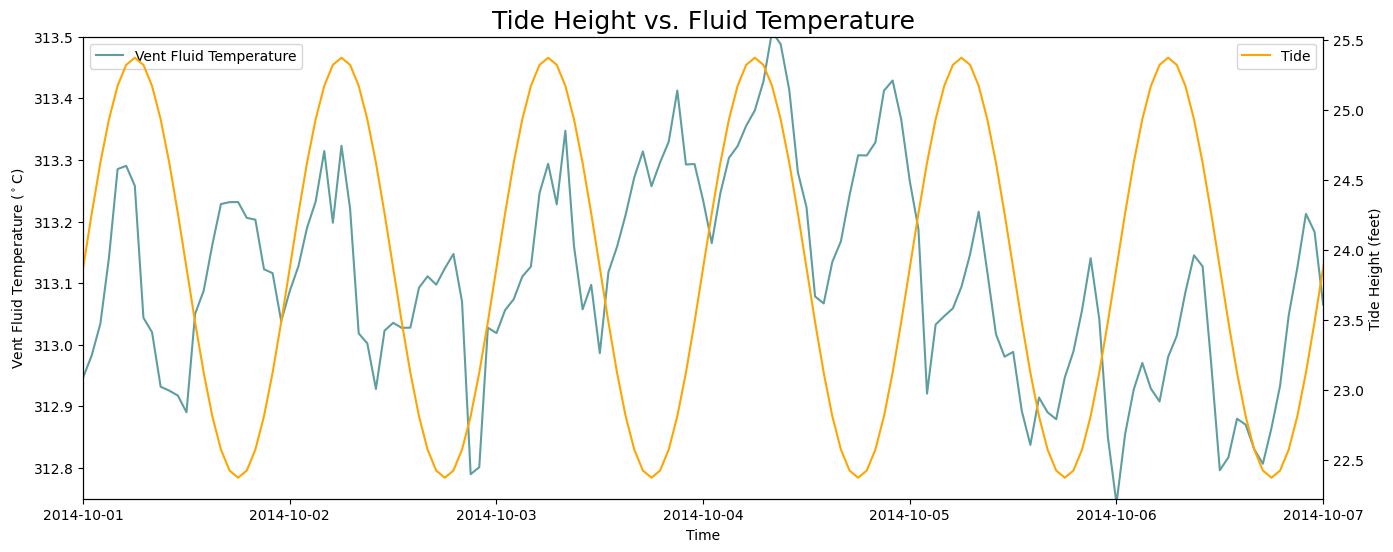

In [60]:
def calculate_lunar_tide(latitude, longitude, date_time):
    # Calculated lunar tide based on the Moon's position
    observer = ephem.Observer()
    observer.lat = str(latitude)
    observer.lon = str(longitude)

    moon = ephem.Moon(date_time)
    moon.compute(observer)

    lunar_tide = 12 * (1 + moon.alt / 90)  # Base lunar tide

    return lunar_tide

def generate_tide_data_with_sine_wave(start_date, end_date, base_tide, amplitude):
    date_format = "%Y-%m-%d %H:%M:%S"
    current_date = start_date
    tide_data = []

    while current_date <= end_date:
        # Calculated lunar tide based on the Moon's position
        lunar_tide = calculate_lunar_tide(latitude, longitude, current_date)

        # Calculated sine wave tidal variation
        sine_variation = amplitude * np.sin(2 * np.pi * current_date.hour / 24)

        # Combined lunar tide and sine wave variation
        combined_tide = base_tide + lunar_tide + sine_variation

        tide_data.append((current_date.strftime(date_format), combined_tide))
        current_date += timedelta(hours=1)

    return tide_data

# Set location to Axial Seamount
latitude = 46.0600
longitude = -130.0000
start_date = datetime(2014, 10, 1, 0, 0, 0)
end_date = datetime(2014, 10, 7, 23, 0, 0)
base_tide = 12  # Base tide level
amplitude = 1.5  # Amplitude of sine wave tidal variation

tide_data = generate_tide_data_with_sine_wave(start_date, end_date, base_tide, amplitude)

# Defined the date_format
date_format = "%Y-%m-%d %H:%M:%S"

vent_temp_resample = df['vent_fluid_temperature'].resample('H').mean()

# Plot vent fluid temperature
fig, axs = plt.subplots(figsize=(16, 6))
axs.plot(vent_temp_resample, color='cadetblue', label='Vent Fluid Temperature')
axs.set_xlim([datetime(2014,10,1), datetime(2014,10,7)])
axs.set_ylim(312.75,313.5)
axs.set_xlabel('Time')
axs.set_ylabel('Vent Fluid Temperature ($^\circ$C)')

# Plot tidal data
axs2 = axs.twinx()
axs2.plot([datetime.strptime(point[0], date_format) for point in tide_data], [point[1] for point in tide_data], label='Tide', color='orange')
axs2.set_ylabel('Tide Height (feet)')

# Set common title
plt.title('Tide Height vs. Fluid Temperature', fontsize=18)

# Show legends
axs.legend(loc='upper left')
axs2.legend(loc='upper right')

plt.show()